# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [7]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Descargar HTML

# 1. Seleccionamos el recurso que queremos descargar:
resource_url = "https://companies-market-cap-copy.vercel.app/index.html"


# 2. Realizamos la petición para descargar la información de la URL:
response = requests.get(resource_url)


# 3. Guardamos el contenido si todo está ok:
if response.status_code != 200:
    raise Exception(f"Se a producido un error: {response.status_code}")
html_content = response.text

print(html_content)


# 4. Transformamos el HTML en un objeto estructurado, (parsear):
soup = BeautifulSoup(html_content,"html.parser")
soup


# 5. Buscamos la tabla con la evolución anual:
table = soup.find("table")
table





<!DOCTYPE html>
<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">
<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">
<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">
<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">
<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">
<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">
<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">
<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">
<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">
<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">
<link rel="icon" type="image/p

<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">2016</span

 Creamos el Dataframe

In [8]:

# 6. Pasamos los datos de la tabla a un Dataframe:
# Extraemos las filas:
rows = table.find_all("tr")
# Procesamos los datos de la tabla:
data = []
for row in rows[1:]:  # Saltar la fila de encabezado
    cols = row.find_all("td")
    fecha = cols[0].text.strip()
    ingresos = cols[1].text.strip()
    data.append([fecha, ingresos])

data

# 7. Creamos el DataFrame a partir de la data y después ordenamos los valores de "fecha":

df = df = pd.DataFrame(data, columns=["Fecha", "Ingresos"])

df = df.sort_values("Fecha")

df


,Fecha,Ingresos
15,2009,$0.11 B
14,2010,$0.11 B
13,2011,$0.20 B
12,2012,$0.41 B
11,2013,$2.01 B
10,2014,$3.19 B
9,2015,$4.04 B
8,2016,$7.00 B
7,2017,$11.75 B
6,2018,$21.46 B


Limpieza del dataframe

In [9]:
# 8. Limpieza del DataFrame eliminando $, B y las filas vacías:
df["Ingresos"] = df["Ingresos"].replace({"[$B]": ""}, regex=True)
df["Ingresos"]

15     0.11 
14     0.11 
13     0.20 
12     0.41 
11     2.01 
10     3.19 
9      4.04 
8      7.00 
7     11.75 
6     21.46 
5     24.57 
4     31.53 
3     53.82 
2     81.46 
1     96.77 
0     97.15 
Name: Ingresos, dtype: object

Paso 5: Almacena los datos en sqlite

In [10]:
# Conectar a SQLite y guardar los datos
conn = sqlite3.connect("tesla_revenues.db")
cursor = conn.cursor()


In [11]:
# Crear tabla en SQLite
cursor.execute("""
CREATE TABLE IF NOT EXISTS ingresos (
    fecha TEXT,
    ingresos REAL
)
""")

In [12]:
# Insertar datos en la base de datos
for index, row in df.iterrows():
    cursor.execute("INSERT INTO ingresos (fecha, ingresos) VALUES (?, ?)", (row["Fecha"], row["Ingresos"]))

conn.commit()
conn.close()

Paso 6: visualiza los datos

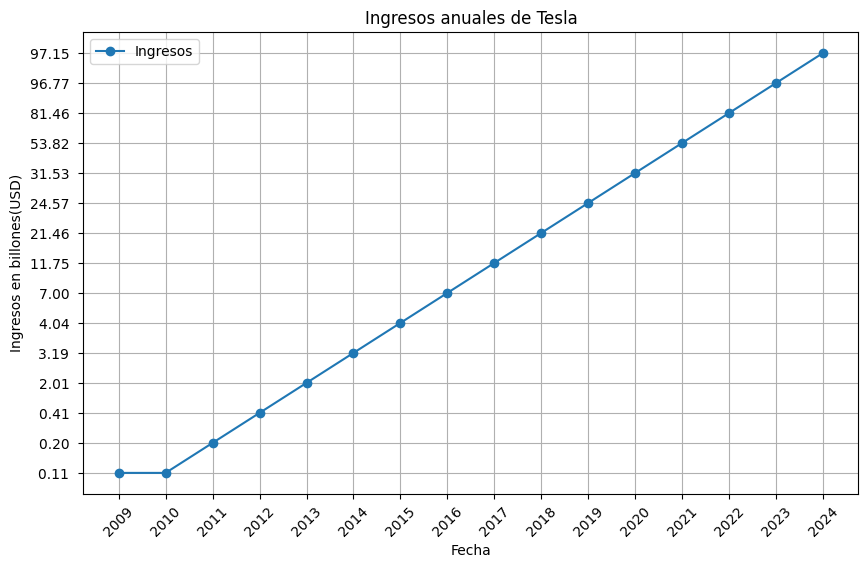

In [13]:
# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(df["Fecha"], df["Ingresos"], marker='o', label="Ingresos")
plt.title("Ingresos anuales de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Ingresos en billones(USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Guardar y mostrar el gráfico
plt.savefig("revenue_plot.png")
plt.show()